<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week12/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering
- basic examples and visualizations

## Datasets

### Face

In [1]:
import numpy as np

def generate_face_points(num_points=500):
    # Eyes
    eye1_center = np.array([-1.5, 0.6])
    eye2_center = np.array([1.5, 0.6])
    eye_radius = 0.15

    eye1 = np.random.multivariate_normal(eye1_center, eye_radius*np.eye(2), size=num_points//4)
    eye2 = np.random.multivariate_normal(eye2_center, eye_radius*np.eye(2), size=num_points//4)

    # Nose
    nose_center = np.array([0, -0.8])
    nose = np.random.multivariate_normal(nose_center, (eye_radius/4)*np.eye(2), size=num_points//8)

    # Mouth
    mouth_length = 3.0
    mouth_center = np.array([0, -1])

    mouth_theta = np.linspace(-np.pi/2, np.pi/2, num_points//2)
    mouth_x = mouth_theta
    mouth_y = mouth_length * (mouth_theta**2 * 0.25 - 1) + np.random.normal(0, 0.21, size=mouth_theta.shape)
    mouth = np.vstack((mouth_x, mouth_y)).T

    # Combine all
    points = np.vstack((eye1, eye2, mouth, nose))

    return points


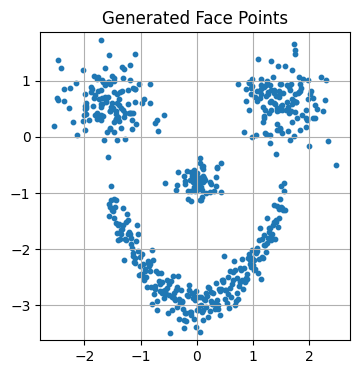

In [2]:
points = generate_face_points(500)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(points[:,0], points[:,1], s=10)
plt.title('Generated Face Points')
plt.axis('equal')
plt.grid(True)
plt.show()

### Countries:

In [3]:
import urllib.request
import pandas as pd

url = 'https://raw.githubusercontent.com/reitezuz/18NES1-2025-/main/week11/countries.csv'
filename = 'countries.csv'

# Load file
urllib.request.urlretrieve(url, filename)


df = pd.read_csv('countries.csv', sep=';')
print(df.head())
print("\nShape:", df.shape)

           Country  Population  Area (sq. mi.)
0     Afghanistan     31056997          647500
1         Albania      3581655           28748
2         Algeria     32930091         2381740
3  American Samoa        57794             199
4         Andorra        71201             468

Shape: (227, 3)


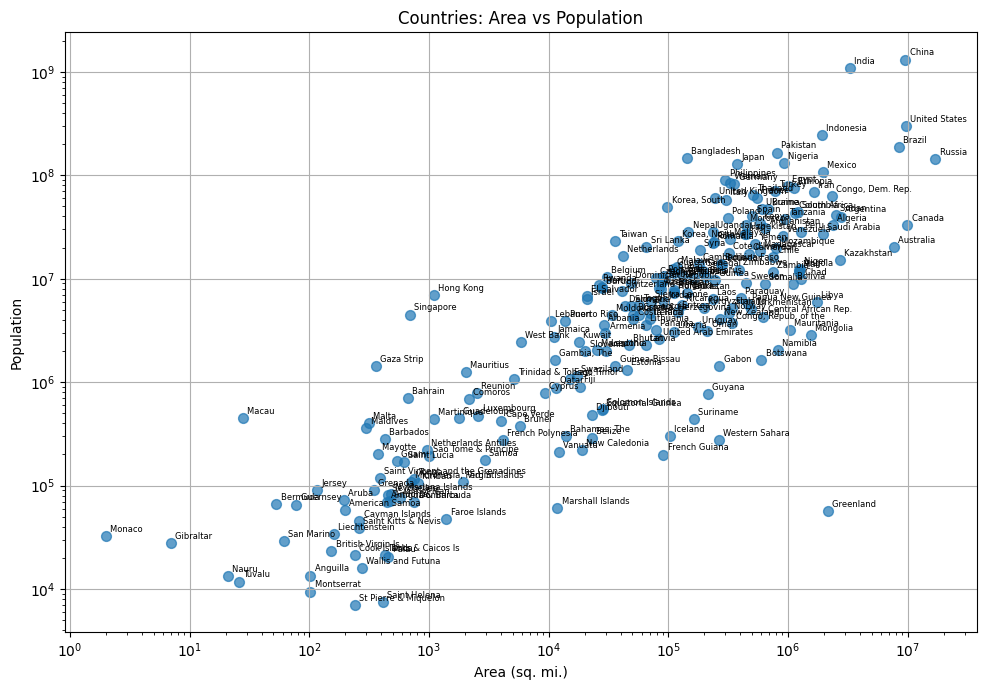

In [4]:
import matplotlib.pyplot as plt

# Scatter plot Area vs Population
plt.figure(figsize=(10, 7))
plt.scatter(df['Area (sq. mi.)'], df['Population'], s=50, alpha=0.7)

# Country names
for i in range(len(df)):
    plt.annotate(df['Country'][i],
                 (df['Area (sq. mi.)'][i], df['Population'][i]),
                 textcoords="offset points", xytext=(3,3), ha='left', fontsize=6)

plt.xscale('log')  # logarithmic scale (area)
plt.yscale('log')  # logarithmic scale (population)
plt.xlabel('Area (sq. mi.)')
plt.ylabel('Population')
plt.title('Countries: Area vs Population')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

def prepare_countries_data(local_filename='countries.csv'):
    """
    Prepare data for clustering.

    Parameters:
    local_filename (str): local filename

    Returns:
    X_scaled (np.ndarray): normalized features
    names (np.ndarray): country names
    """

    # Parse CSV
    df = pd.read_csv(local_filename, sep=';')

    # Features for clustering
    X = df[['Area (sq. mi.)', 'Population']].values

    # Normalize features ... logarithm and minmax:
    X = np.log(X)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Names (for visualization or labeling)
    names = df['Country'].values

    return X_scaled, names

X_countries, country_names = prepare_countries_data()

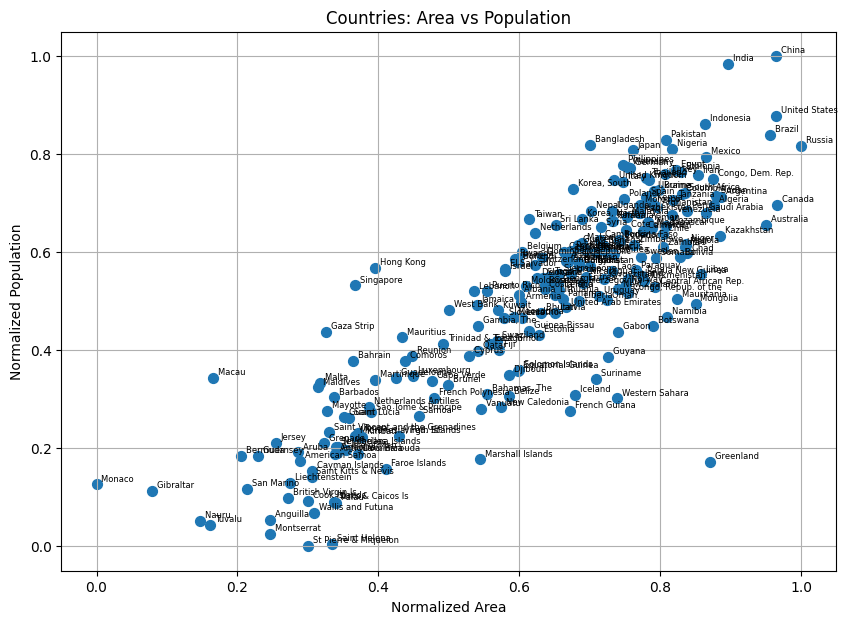

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
plt.scatter(X_countries[:, 0], X_countries[:, 1], s=50)

# Country names
for i, name in enumerate(country_names):
    plt.text(X_countries[i, 0]+0.007, X_countries[i, 1]+0.007, name,
             ha='left', fontsize=6)


plt.xlabel('Normalized Area')
plt.ylabel('Normalized Population')
plt.title('Countries: Area vs Population')
plt.grid(True)
plt.show()

### European countries

Data shape: (27, 2)


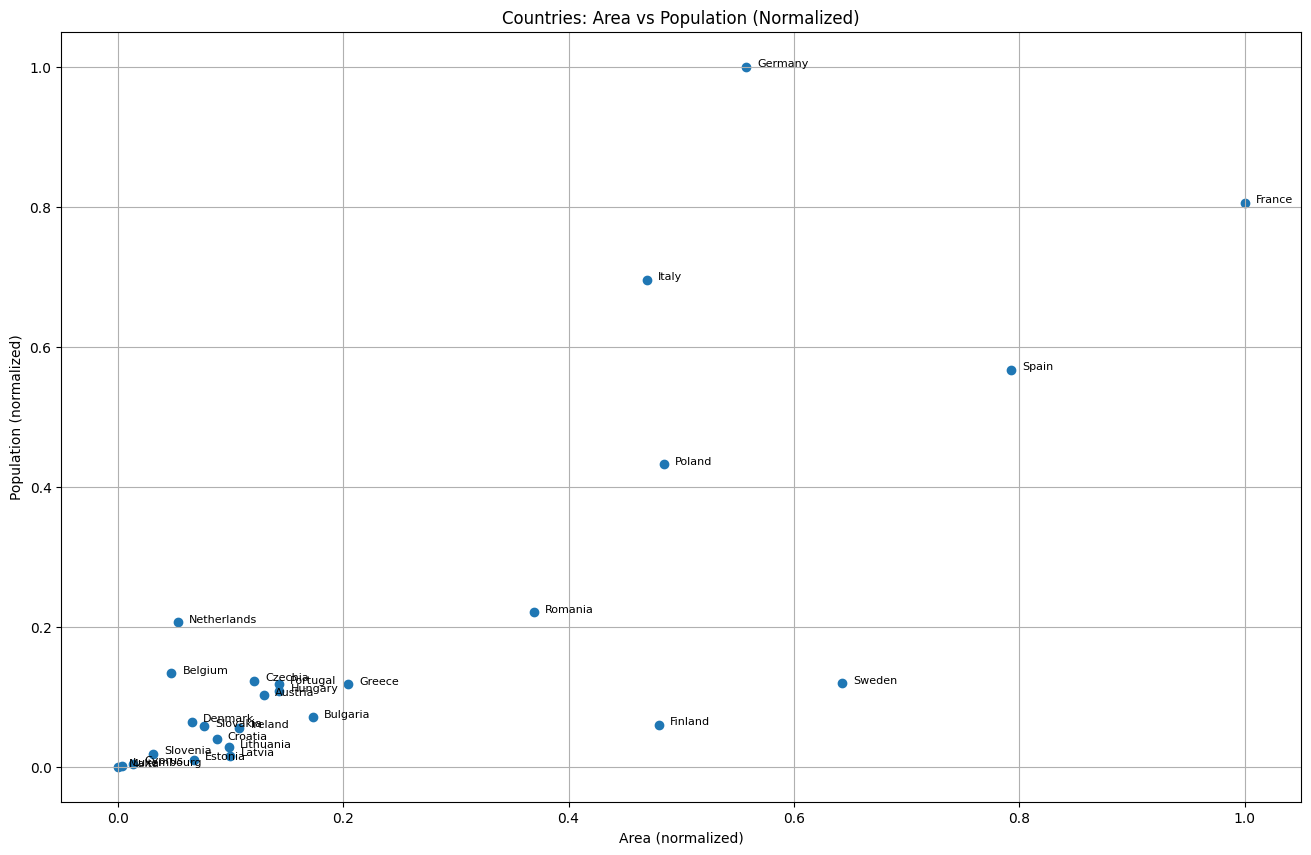

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data: [Area, Population]
country_data = np.array([
    [82519, 9104772],
    [30452, 11754004],
    [110001, 6447710],
    [55896, 3850894],
    [9213, 920701],
    [77212, 10827529],
    [41987, 5932654],
    [43110, 1365884],
    [304316, 5563970],
    [633886, 68070697],
    [353296, 84358845],
    [130048, 10394055],
    [91248, 9597085],
    [68655, 5194336],
    [297825, 58850717],
    [63290, 1883008],
    [62643, 2857279],
    [2586, 660809],
    [313, 542051],
    [34188, 17811291],
    [307236, 36753736],
    [90996, 10467366],
    [234270, 19051562],
    [48702, 5428792],
    [20145, 2116792],
    [502654, 48059777],
    [407300, 10521556]
])

country_names = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
                 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
                 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


print(f'Data shape: {country_data.shape}')

# Normalize the data (similar to mapminmax in MATLAB)
scaler = MinMaxScaler()
#scaler = StandardScaler()
data_scaled = scaler.fit_transform(country_data)

# --- Scatter plot of normalized data ---
plt.figure(figsize=(16,10))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
for i, name in enumerate(country_names):
    plt.text(data_scaled[i,0]+0.01, data_scaled[i,1], name, fontsize=8)
plt.title("Countries: Area vs Population (Normalized)")
#plt.xscale('log')  # logarithmic scale (area)
#plt.yscale('log')  # logarithmic scale (population)
plt.xlabel("Area (normalized)")
plt.ylabel("Population (normalized)")
plt.grid(True)
plt.show()




# Hierarchical clustering example:

## Dendrogram tree:

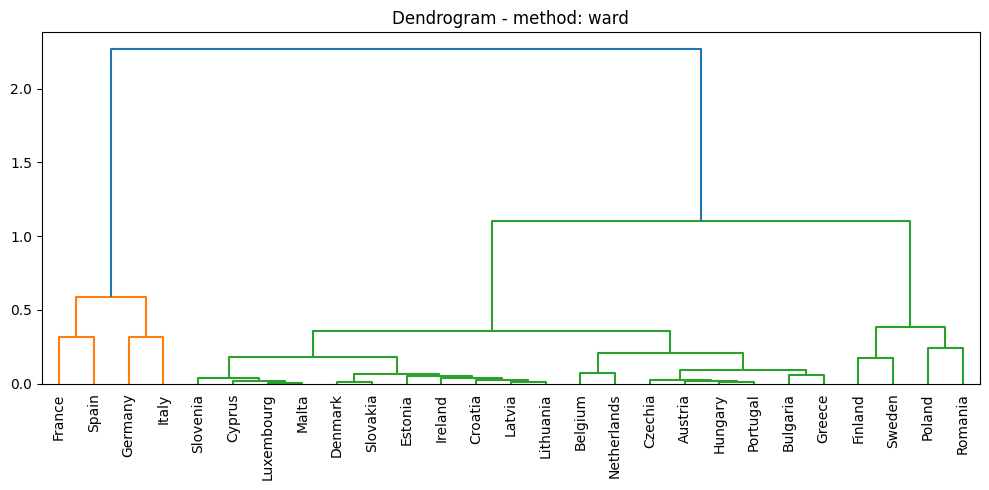

In [8]:
# --- Hierarchical clustering ---
method = 'ward'  # can be 'single', 'complete', 'average', 'centroid', 'ward',...
metric = 'euclidean' # 'euclidean', 'cityblock', 'cosine', 'chebyshev', 'sqeuclidean',  ...

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(data_scaled, method=method, metric=metric)

# --- Dendrogram ---
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=country_names, leaf_rotation=90)
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()



### Create k clusters from the tree:

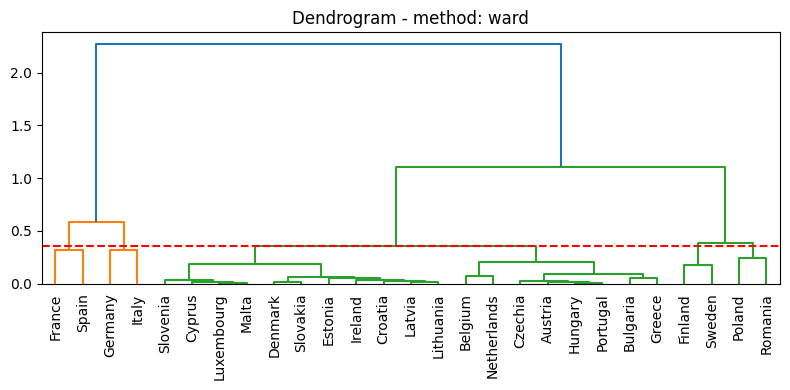

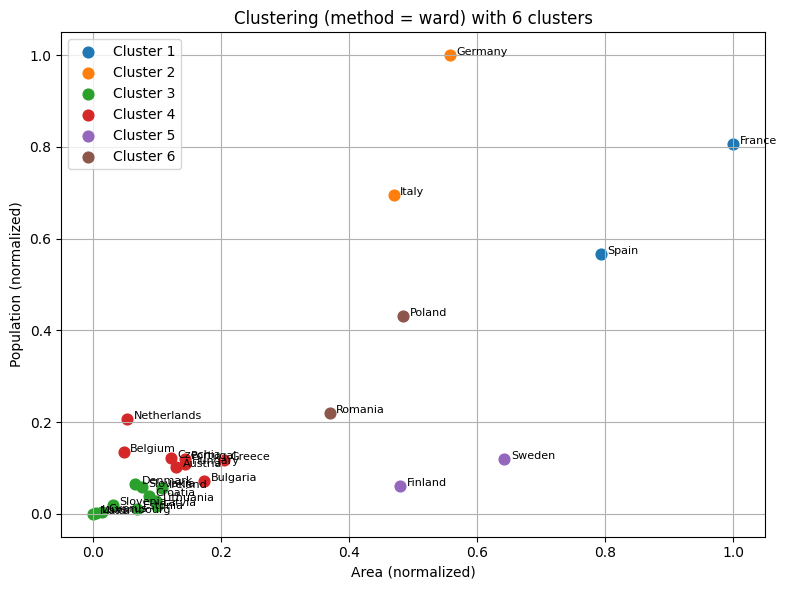

In [9]:
# --- Create flat clusters from the tree ---
num_clusters = 6
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# --- Dendrogram ---
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=country_names, leaf_rotation=90)
threshold = sorted(Z[:, 2])[-(num_clusters - 1)]  # where the tree is cut
plt.axhline(y=threshold, color='red', linestyle='--', label='cut threshold')
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()

# --- Plot clustered countries ---
plt.figure(figsize=(8,6))
for c in range(1, num_clusters+1):
    plt.scatter(data_scaled[cluster_labels == c, 0],
                data_scaled[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

for i, name in enumerate(country_names):
    plt.text(data_scaled[i,0]+0.01, data_scaled[i,1], name, fontsize=8)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.xlabel("Area (normalized)")
plt.ylabel("Population (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Create clusters based on threshold height in the tree (i.e., based on distance):

Number of clusters: 6


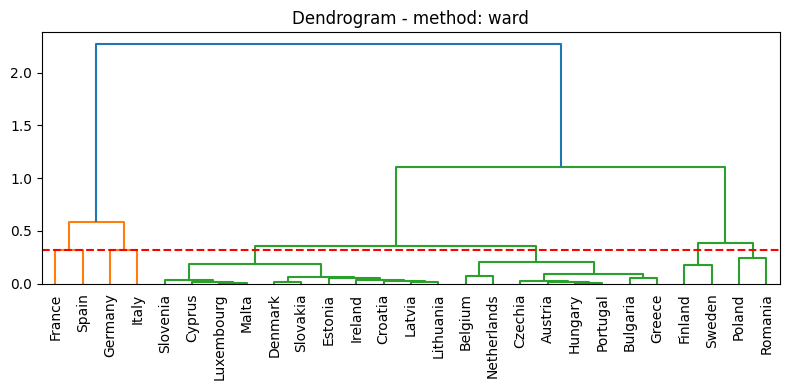

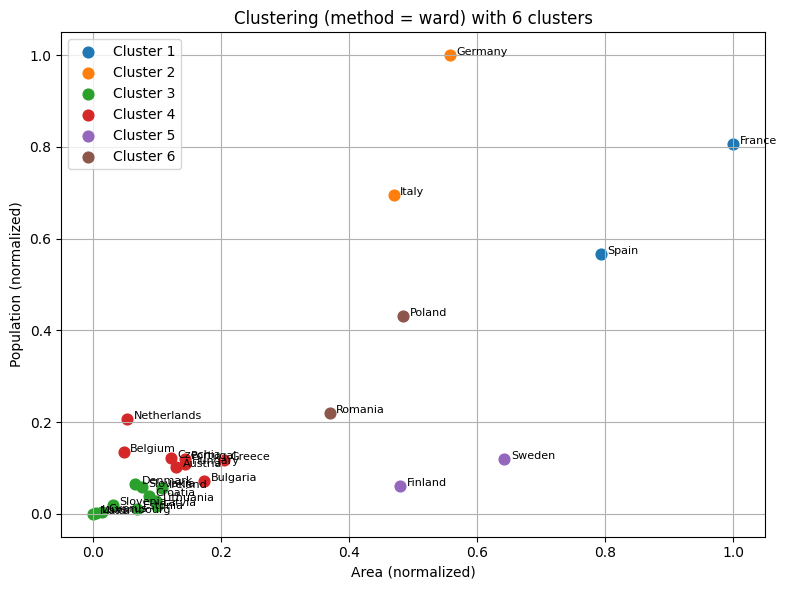

In [10]:
# --- Create flat clusters from the tree ---
threshold = 0.32
cluster_labels = fcluster(Z, threshold, criterion='distance')
num_clusters = len(set(cluster_labels))
print("Number of clusters:", num_clusters)

# --- Dendrogram ---
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=country_names, leaf_rotation=90)
plt.axhline(y=threshold, color='red', linestyle='--', label='cut threshold')
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()

# --- Plot clustered countries ---
plt.figure(figsize=(8,6))
for c in range(1, num_clusters+1):
    plt.scatter(data_scaled[cluster_labels == c, 0],
                data_scaled[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

for i, name in enumerate(country_names):
    plt.text(data_scaled[i,0]+0.01, data_scaled[i,1], name, fontsize=8)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.xlabel("Area (normalized)")
plt.ylabel("Population (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Create clusters based on inconsistency coefficient  
– adaptive, branch-wise cutting based on local merge deviations


In [11]:
for t in [0.8, 1.0, 1.1, 1.2, 1.5, 2.0]:
    labels = fcluster(Z, t=t, criterion='inconsistent')
    print(f"Threshold: {t}, Clusters: {len(set(labels))}")

Threshold: 0.8, Clusters: 10
Threshold: 1.0, Clusters: 9
Threshold: 1.1, Clusters: 7
Threshold: 1.2, Clusters: 1
Threshold: 1.5, Clusters: 1
Threshold: 2.0, Clusters: 1


Number of clusters: 7


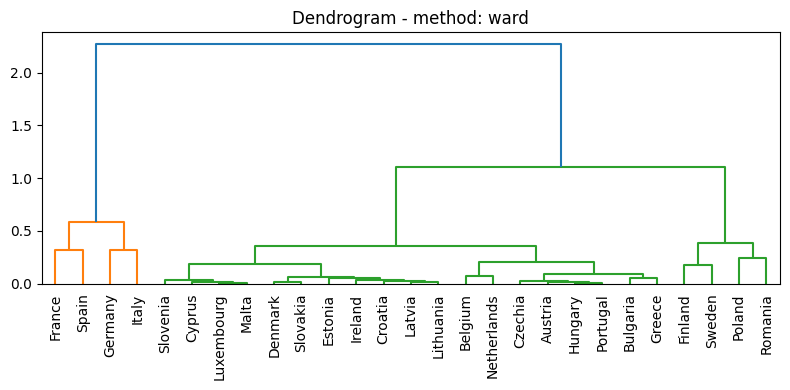

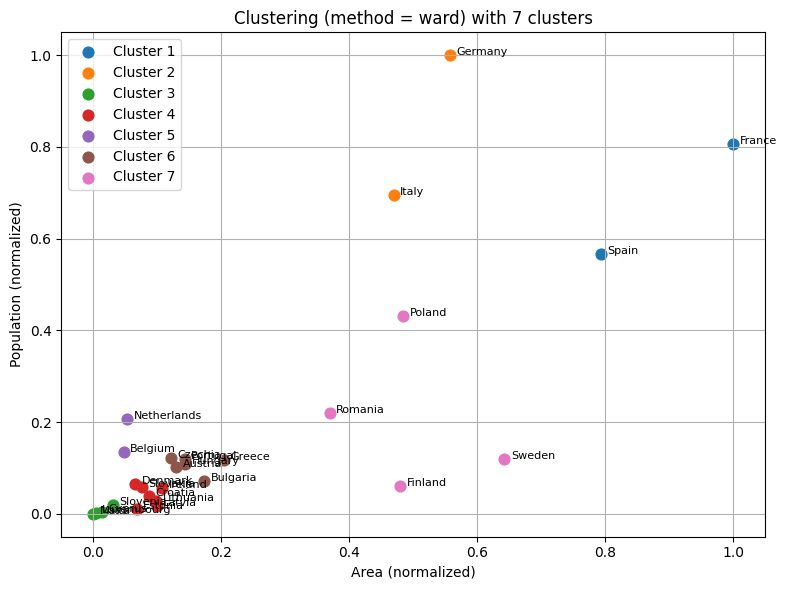

In [12]:
# --- Create flat clusters from the tree ---
threshold = 1.1
cluster_labels = fcluster(Z, threshold, criterion='inconsistent')
num_clusters = len(set(cluster_labels))
print("Number of clusters:", num_clusters)


# --- Dendrogram ---
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=country_names, leaf_rotation=90)
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()

# --- Plot clustered countries ---
plt.figure(figsize=(8,6))
for c in range(1, num_clusters+1):
    plt.scatter(data_scaled[cluster_labels == c, 0],
                data_scaled[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

for i, name in enumerate(country_names):
    plt.text(data_scaled[i,0]+0.01, data_scaled[i,1], name, fontsize=8)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.xlabel("Area (normalized)")
plt.ylabel("Population (normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# General example

## Chose the dataset
- blobs1, blobs2 - simple 2D data
- face, moons, circle - hard exampes
- iris, countries - real-world data

Data shape: (300, 2)


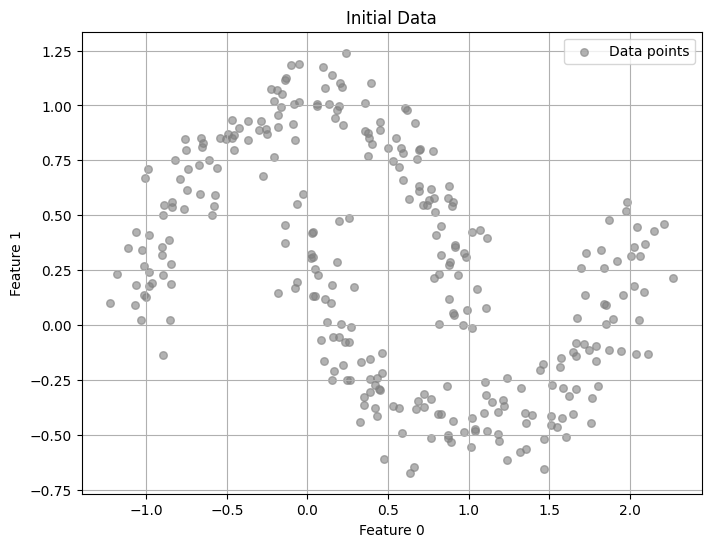

In [28]:
# Choose dataset
dataset_choice = 'moons'  # options: 'blobs1', 'blobs2', 'face', 'moons', 'circles', 'iris', 'countries'

import numpy as np
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def get_dataset(dataset_choice):
    if dataset_choice == 'blobs1':
        data, _ = make_blobs(n_samples=300, centers=[[1,1], [-1,-1], [2,-2]], cluster_std=[0.75, 0.5, 0.5], random_state=42)
        #data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
    elif dataset_choice == 'blobs2':
        data, _ = make_blobs(n_samples=400, centers=[[1,1], [1,-0.5], [-1,-1], [2,-2]], cluster_std=[0.25, 0.75, 0.5, 0.5], random_state=42)

    elif dataset_choice == 'face':
        data = generate_face_points()
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
    elif dataset_choice == 'moons':
        data = make_moons(n_samples=300, noise=0.1, random_state=42)[0]
    elif dataset_choice == 'circles':
        data = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)[0]

    elif dataset_choice == 'iris':
        iris = load_iris()
        data = iris.data
        scaler = MinMaxScaler()
        data = scaler.fit_transform(data)
    elif dataset_choice == 'countries':
        data, _ = prepare_countries_data()
    else:
        raise ValueError("Unknown dataset choice.")
    return data

data = get_dataset(dataset_choice)
print(f'Data shape: {data.shape}')



# Choose dimensions to plot (in case of higher dimensional data)
dims = (0, 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(data[:, dims[0]], data[:, dims[1]], c='gray', s=30, alpha=0.6, label='Data points')
plt.xlabel(f'Feature {dims[0]}')
plt.ylabel(f'Feature {dims[1]}')
plt.title('Initial Data')
plt.legend()
plt.grid(True)
plt.show()

## Dendrogram

- set the method and metric:

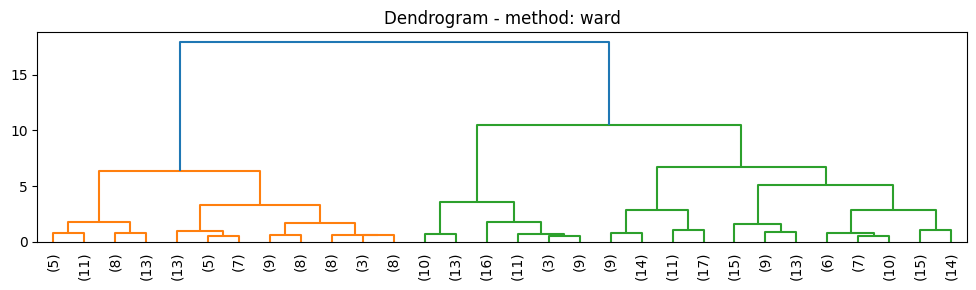

In [14]:
# --- Hierarchical clustering ---
method = 'ward'  # can be 'single', 'complete', 'average', 'centroid', 'ward',...
metric = 'euclidean' # 'euclidean', 'cityblock', 'cosine', 'chebyshev', 'sqeuclidean',  ...

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
Z = linkage(data, method=method, metric=metric)

# --- Dendrogram ---
plt.figure(figsize=(10, 3))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()

In [15]:
for t in [0.8, 1.0, 1.1, 1.2, 1.5, 2.0]:
    labels = fcluster(Z, t=t, criterion='inconsistent')
    print(f"Threshold: {t}, Clusters: {len(set(labels))}")

Threshold: 0.8, Clusters: 118
Threshold: 1.0, Clusters: 105
Threshold: 1.1, Clusters: 86
Threshold: 1.2, Clusters: 1
Threshold: 1.5, Clusters: 1
Threshold: 2.0, Clusters: 1


## Create clusters:

- set the method for determining the number of clusters:

Number of clusters: 4


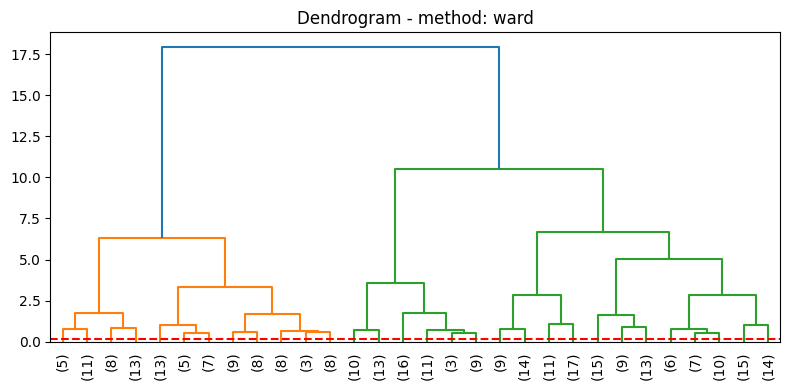

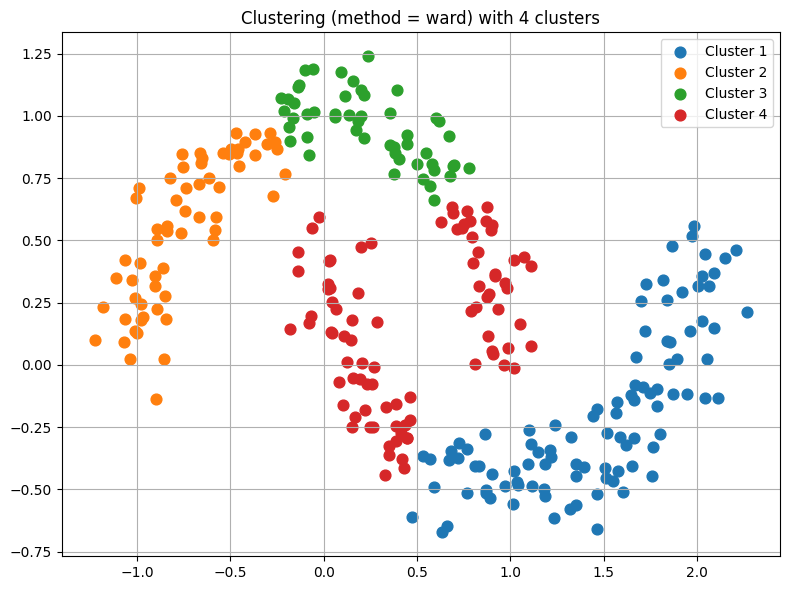

In [16]:
# --- Create flat clusters from the tree ---
type = "num_clusters" # "num_clusters", "distance", "inconsistent"
num_clusters = 4
threshold = 0.18      # for distance
inc_threshold = 1.1  # for inconsistency

if type == "num_clusters":
    cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
elif type == "distance":
    cluster_labels = fcluster(Z, threshold, criterion = 'distance')
    threshold = sorted(Z[:, 2])[-(num_clusters - 1)]  # where the tree is cut
else:
    cluster_labels = fcluster(Z, inc_threshold, criterion='inconsistent')

num_clusters = len(set(cluster_labels))
print("Number of clusters:", num_clusters)

# --- Dendrogram ---
plt.figure(figsize=(8, 4))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90)
if type == "distance" or type == "num_clusters":
    plt.axhline(y=threshold, color='red', linestyle='--', label='cut threshold')
plt.title(f"Dendrogram - method: {method}")
plt.tight_layout()
plt.show()

# --- Plot clusters ---
plt.figure(figsize=(8,6))
for c in range(1, num_clusters+1):
    plt.scatter(data[cluster_labels == c, 0],
                data[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ScikitLearn Agglomerative clustering

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

- disadvantages: no dendrogram, we have to set the number of clusters in advance

Data shape: (150, 4)


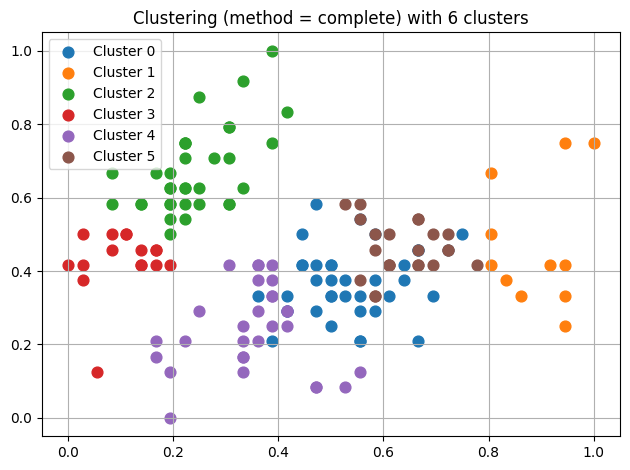

In [29]:
num_clusters = 6  # number of clusters
metric = 'euclidean'  # distance metric: 'euclidean', 'manhattan', 'cosine', etc.
method = 'complete'  # linkage method: 'ward', 'complete', 'average', 'single'
dataset_choice = 'iris'  # options: 'blobs1', 'blobs2', 'face', 'moons', 'circles', 'iris', 'countries'


import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


# --- Get data ---
data = get_dataset(dataset_choice)
print(f'Data shape: {data.shape}')

# --- Run Agglomerative Clustering ---
model = AgglomerativeClustering(
    n_clusters=num_clusters,           # Number of clusters to form
    metric=metric,                   # Distance metric: 'euclidean', 'manhattan', 'cosine', etc.
    linkage=method                     # Linkage method: 'ward', 'complete', 'average', 'single'
)

cluster_labels = model.fit_predict(data)  # Cluster assignment for each data point (array shape: [n_samples])


# --- Plot clusters ---
for c in range(0, num_clusters):
    plt.scatter(data[cluster_labels == c, 0],
                data[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluate the quality of clustering:

### Plot Silhouette

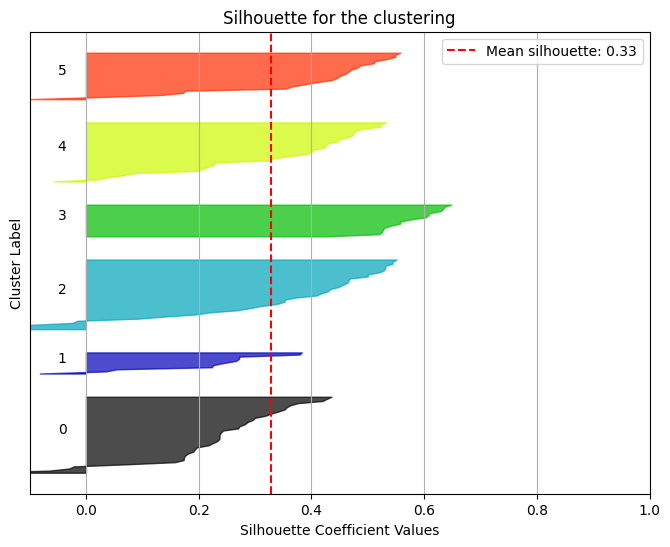

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(data, assignments, title="Silhouette Plot"):
    """
    Plot the silhouette coefficients for a given clustering result.

    Parameters:
    - data (np.ndarray): dataset of shape (n_samples, n_features)
    - assignments (np.ndarray): cluster labels for each sample
    - title (str): plot title
    """
    n_clusters = len(np.unique(assignments))

    if n_clusters < 2:
        raise ValueError("Silhouette plot requires at least 2 clusters.")

    # Compute silhouette scores
    sample_silhouette_values = silhouette_samples(data, assignments)
    mean_silhouette_score = silhouette_score(data, assignments)

    fig, ax = plt.subplots(figsize=(8, 6))

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[assignments == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing between clusters

    ax.set_title(title)
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=mean_silhouette_score, color="red", linestyle="--", label=f"Mean silhouette: {mean_silhouette_score:.2f}")
    ax.legend()
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    plt.grid(True)
    plt.show()

plot_silhouette(data, cluster_labels, title="Silhouette for the clustering")

### Finding the optimal nuber of clusters

#### Elbow method

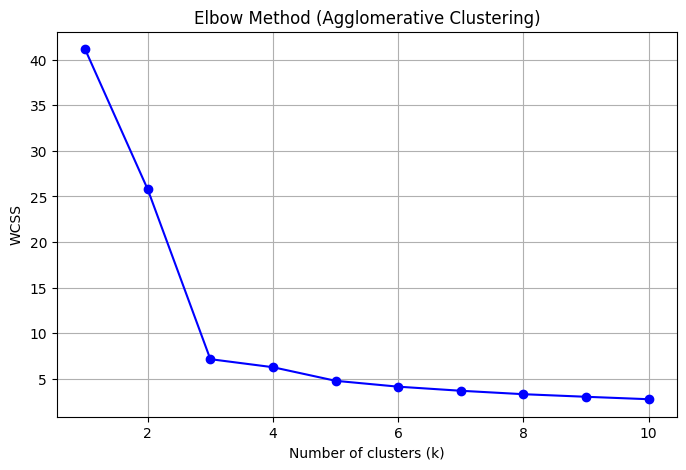

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

def compute_wcss(data, labels, k):
    wcss = 0
    for cluster_idx in range(k):
        cluster_points = data[labels == cluster_idx]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
            wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

wcss = []
k_values = range(1, 11)

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, metric=metric,linkage=method)
    labels = model.fit_predict(data)
    wcss.append(compute_wcss(data, labels, k))

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method (Agglomerative Clustering)')
plt.grid(True)
plt.show()


#### Other methods

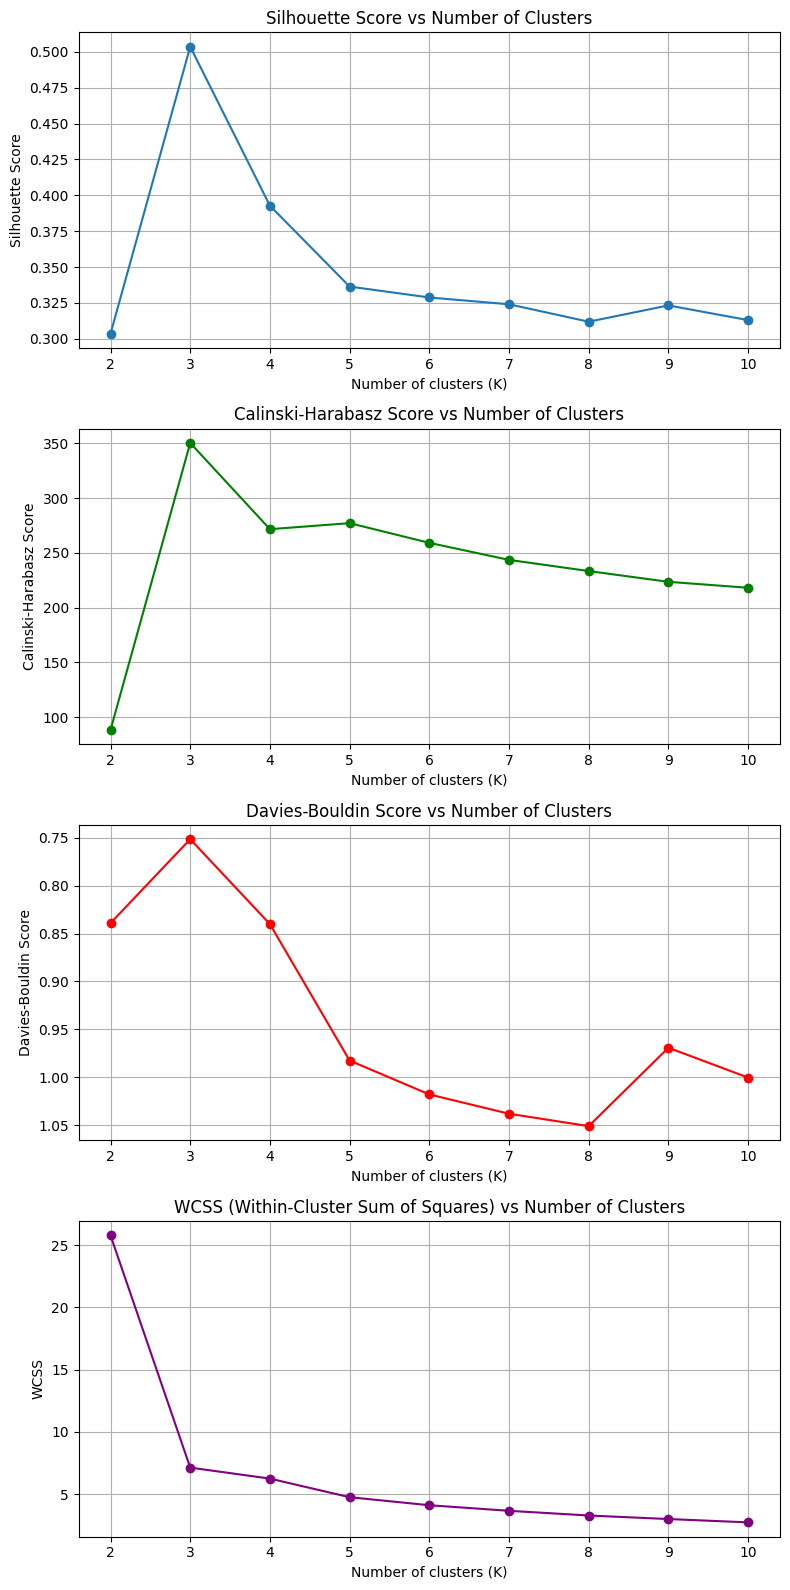

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_blobs

# Step 1: Generate example dataset
...

# Step 2: Prepare lists
K_range = range(2, 11)  # Try K from 2 to 10
silhouette_scores = []
calinski_scores = []
davies_scores = []
wcss_scores = []

# Helper: Compute WCSS manually (AgglomerativeClustering does not return inertia_)
def compute_wcss(data, labels, k):
    wcss = 0
    for cluster_idx in range(k):
        cluster_points = data[labels == cluster_idx]
        if len(cluster_points) > 0:
            centroid = cluster_points.mean(axis=0)
            wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Step 3: Compute metrics for each K
for k in K_range:
    model = AgglomerativeClustering(n_clusters=k, metric=metric,linkage=method)
    labels = model.fit_predict(data)

    silhouette_scores.append(silhouette_score(data, labels))
    calinski_scores.append(calinski_harabasz_score(data, labels))
    davies_scores.append(davies_bouldin_score(data, labels))
    wcss_scores.append(compute_wcss(data, labels, k))  # <- manual WCSS

# Step 4: Plot the results
fig, axs = plt.subplots(4, 1, figsize=(8, 16))  # <- 4 plots

# Silhouette Score
axs[0].plot(K_range, silhouette_scores, marker='o')
axs[0].set_title('Silhouette Score vs Number of Clusters')
axs[0].set_xlabel('Number of clusters (K)')
axs[0].set_ylabel('Silhouette Score')
axs[0].grid(True)

# Calinski-Harabasz Score
axs[1].plot(K_range, calinski_scores, marker='o', color='green')
axs[1].set_title('Calinski-Harabasz Score vs Number of Clusters')
axs[1].set_xlabel('Number of clusters (K)')
axs[1].set_ylabel('Calinski-Harabasz Score')
axs[1].grid(True)

# Davies-Bouldin Score
axs[2].plot(K_range, davies_scores, marker='o', color='red')
axs[2].set_title('Davies-Bouldin Score vs Number of Clusters')
axs[2].set_xlabel('Number of clusters (K)')
axs[2].set_ylabel('Davies-Bouldin Score')
axs[2].invert_yaxis()  # Lower is better
axs[2].grid(True)

# WCSS (manual Elbow method)
axs[3].plot(K_range, wcss_scores, marker='o', color='purple')
axs[3].set_title('WCSS (Within-Cluster Sum of Squares) vs Number of Clusters')
axs[3].set_xlabel('Number of clusters (K)')
axs[3].set_ylabel('WCSS')
axs[3].grid(True)

plt.tight_layout()
plt.show()


### Silhouette for the winner clustering

Best K according to Silhouette: 3
Best K according to Calinski-Harabasz: 3
Best K according to Davies-Bouldin: 3
Best K according to Elbow (WCSS): 3


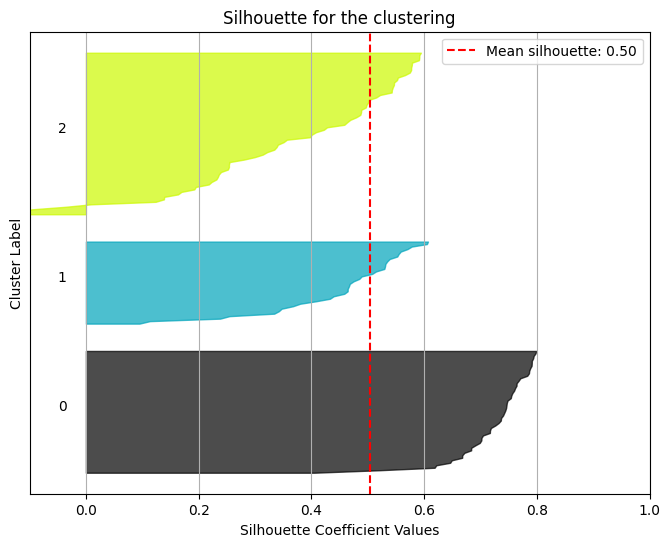

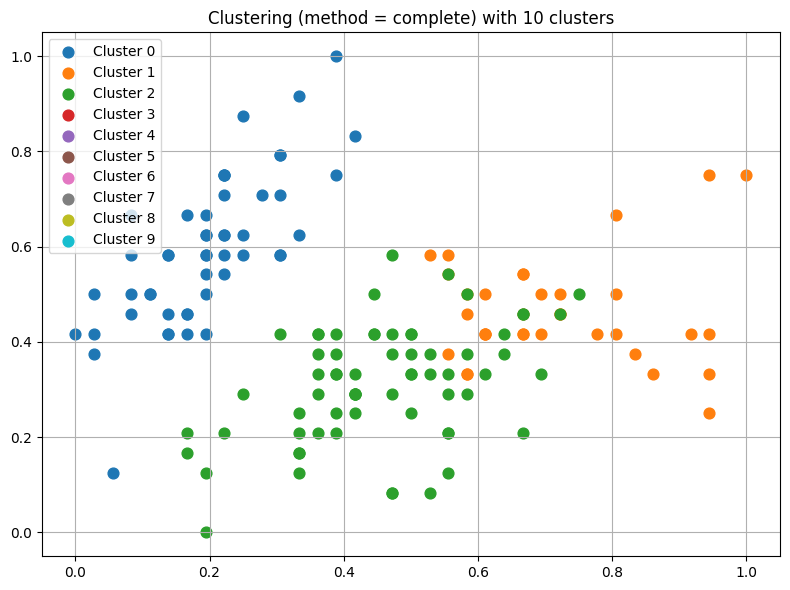

In [35]:
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
optimal_k_calinski = K_range[np.argmax(calinski_scores)]
optimal_k_davies = K_range[np.argmin(davies_scores)]
wcss_diffs = np.diff(wcss_scores)
optimal_k_wcss = K_range[np.argmax(-wcss_diffs)+1]   # point of greatest decline

print(f"Best K according to Silhouette: {optimal_k_silhouette}")
print(f"Best K according to Calinski-Harabasz: {optimal_k_calinski}")
print(f"Best K according to Davies-Bouldin: {optimal_k_davies}")
print(f"Best K according to Elbow (WCSS): {optimal_k_wcss}")

# silouhette plot for the winner:
# --- Run Agglomerative Clustering ---
model = AgglomerativeClustering(
    n_clusters=optimal_k_silhouette, # Number of clusters to form
    metric=metric,                   # Distance metric: 'euclidean', 'manhattan', 'cosine', etc.
    linkage=method                   # Linkage method: 'ward', 'complete', 'average', 'single'
)

cluster_labels = model.fit_predict(data)
plot_silhouette(data, cluster_labels, title="Silhouette for the clustering")


# --- Plot clusters ---
num_clusters = len(set(labels))
plt.figure(figsize=(8,6))
for c in range(0, num_clusters):
    plt.scatter(data[cluster_labels == c, 0],
                data[cluster_labels == c, 1],
                label=f'Cluster {c}', s=60)

plt.title(f"Clustering (method = {method}) with {num_clusters} clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()